# Introduction into Exploratory Data Analysis (EDA)

## Exploring Daily Statistics for Trending YouTube Videos

## Let's get started

Set-up your working environment

In [77]:
# import the necessary libraries you need for your analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Understand your Data

As first part of an EDA it is important to find out what information is contained in the data set.  
We start by reading in our data and get some basic information for our dataset.  

In [78]:
# read in csv file and display first 5 rows of datset
df = pd.read_feather("data/Sales_data.ftr")
df.head

<bound method NDFrame.head of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1          None                        None             None       None   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0  

In [79]:
# check which columns are included in our dataframe
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [80]:
df.duplicated().value_counts()

False    185688
True       1162
Name: count, dtype: int64

In [81]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [82]:
df = df.dropna(how = 'all')

In [83]:
df.drop_duplicates(inplace=True)

/var/folders/yp/8t7v6p3s5855ldr9bpsdvdxr0000gn/T/ipykernel_11078/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [84]:
df.shape

(185687, 6)

## Analysis of monthy sales

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [86]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [87]:
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [101]:
df[df.order_date == 'Order Date']

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185686 non-null  object        
 1   product           185686 non-null  object        
 2   quantity_ordered  185686 non-null  int64         
 3   price_each        185686 non-null  float64       
 4   order_date        185686 non-null  datetime64[ns]
 5   purchase_address  185686 non-null  object        
 6   month             185686 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 10.6+ MB


In [100]:
# Delete row at index 516
df = df.drop(index=519)


In [102]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%m/%d/%y %H:%M")


In [104]:
df['month'] = df['order_date'].dt.month


In [137]:
df

,index,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
185681,186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
185682,186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
185683,186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
185684,186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [106]:
df.quantity_ordered = df.quantity_ordered.astype(int)

In [107]:
df.price_each = df.price_each.astype(float)

In [109]:
df['sales'] = df.quantity_ordered*df.price_each

In [114]:
df_month_sales = df.groupby('month')['sales'].sum()

<Axes: >

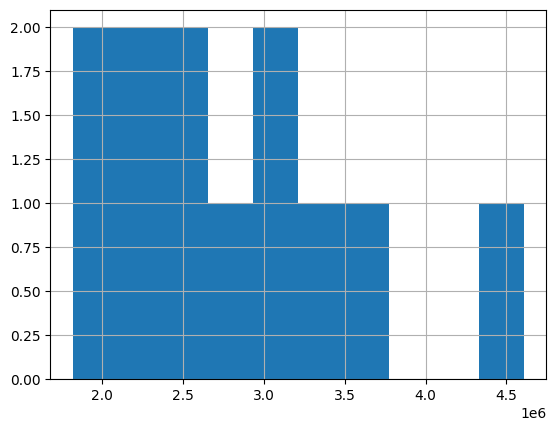

In [120]:
df_month_sales.hist()

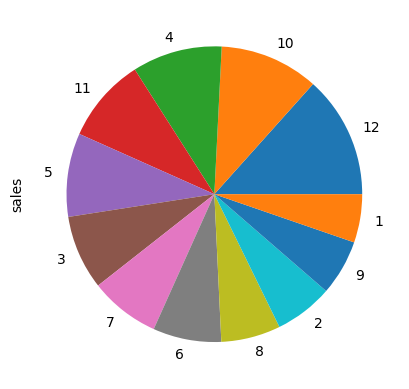

In [131]:
df_month_sales = df.groupby('month')['sales'].sum().sort_values(ascending=False).plot(kind = 'pie')

## Explore and clean your data

In [121]:
df.purchase_address[0]

'917 1st St, Dallas, TX 75001'

In [125]:
df.purchase_address.str.split(',')[0][0]

'917 1st St'

In [126]:
df['city'] = df.purchase_address.str.split(',').str.get(1)

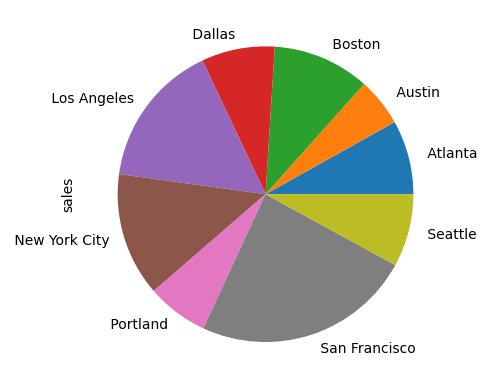

In [129]:
df_city_sales = df.groupby('city')['sales'].sum().plot(kind = 'pie')

<Axes: ylabel='count'>

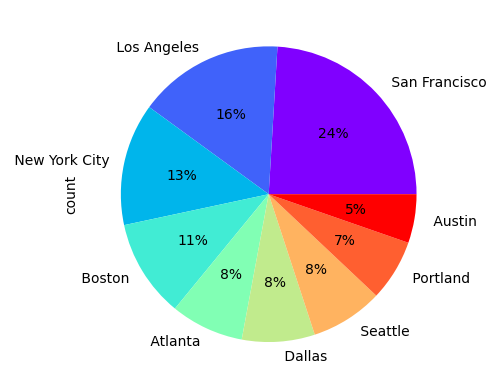

In [135]:
pd.value_counts(df.city).plot(kind='pie', autopct = '%1.0f%%', colormap='rainbow')

In [136]:
df.reset_index(inplace=True)

In [139]:
df.drop(columns='index', inplace=True)

## The most product sold and why?

/var/folders/yp/8t7v6p3s5855ldr9bpsdvdxr0000gn/T/ipykernel_11078/3393122349.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_max['product'], rotation=30, ha='right', fontsize=10)


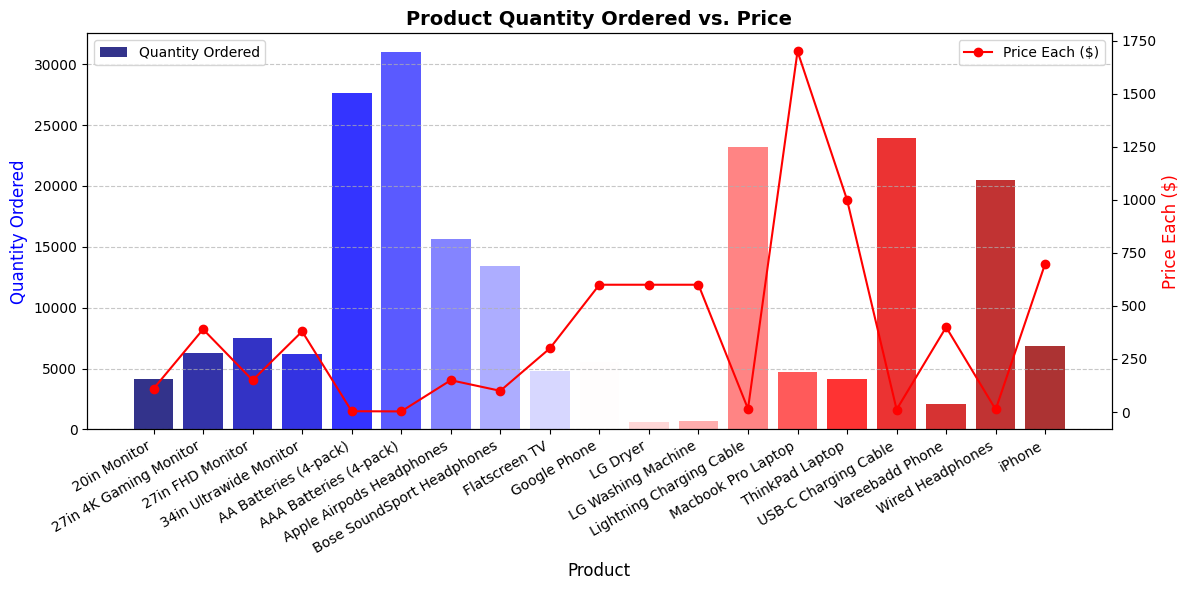

In [159]:
df_max = df.groupby('product').agg({'quantity_ordered':'sum', 'price_each':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bar_colors = sns.color_palette("seismic", len(df_max))
ax1.bar(df_max['product'], df_max['quantity_ordered'], color=bar_colors, alpha=0.8, label='Quantity Ordered')

ax2.plot(df_max['product'], df_max['price_each'], color='red', marker='o', label='Price Each ($)')

ax1.set_xticklabels(df_max['product'], rotation=30, ha='right', fontsize=10)

ax1.set_xlabel("Product", fontsize=12)
ax1.set_ylabel("Quantity Ordered", fontsize=12, color='blue')
ax2.set_ylabel("Price Each ($)", fontsize=12, color='red')
plt.title("Product Quantity Ordered vs. Price", fontsize=14, weight='bold')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

,quantity_ordered,price_each
product,,
20in Monitor,4126,109.99
27in 4K Gaming Monitor,6239,389.99
27in FHD Monitor,7541,149.99
34in Ultrawide Monitor,6192,379.99
AA Batteries (4-pack),27615,3.84
AAA Batteries (4-pack),30986,2.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
Flatscreen TV,4813,300.00


## Most sold product and anlysis with month

In [180]:
top_5_products = df['product'].value_counts().nlargest(5).index
msp = df[df['product'].isin(top_5_products)]

In [182]:
msp.groupby(['month', 'product']).size()

month  product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [184]:
msp_df = msp.groupby(['month', 'product']).size().unstack()

<Axes: xlabel='month'>

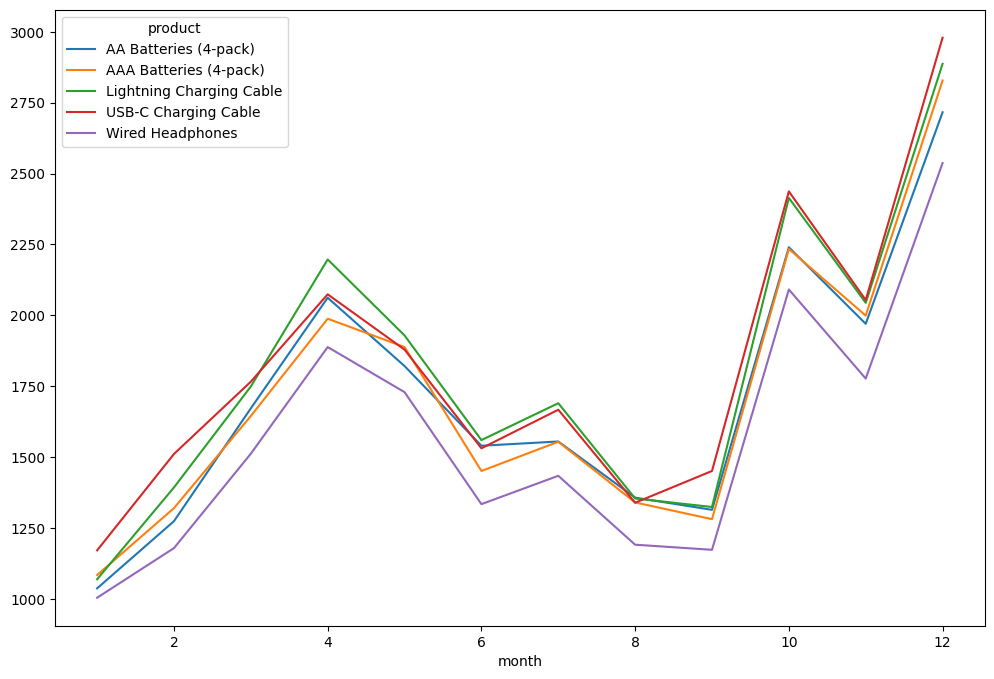

In [186]:
msp_df.plot(figsize=(12,8))

## What products are most often sold

In [191]:
filt1  = df[df.order_id.duplicated(keep=False)]

In [195]:
group_pro = filt1.groupby('order_id')['product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'product':'grouped_product'})

In [199]:
df2 = filt1.merge(group_pro, how = 'left', on = ['order_id'])

In [202]:
df2_group = df2.drop_duplicates(subset=['order_id'])

In [204]:
df2_group

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,grouped_product
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,2019-09-28 13:07:00,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,2019-09-15 18:54:00,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


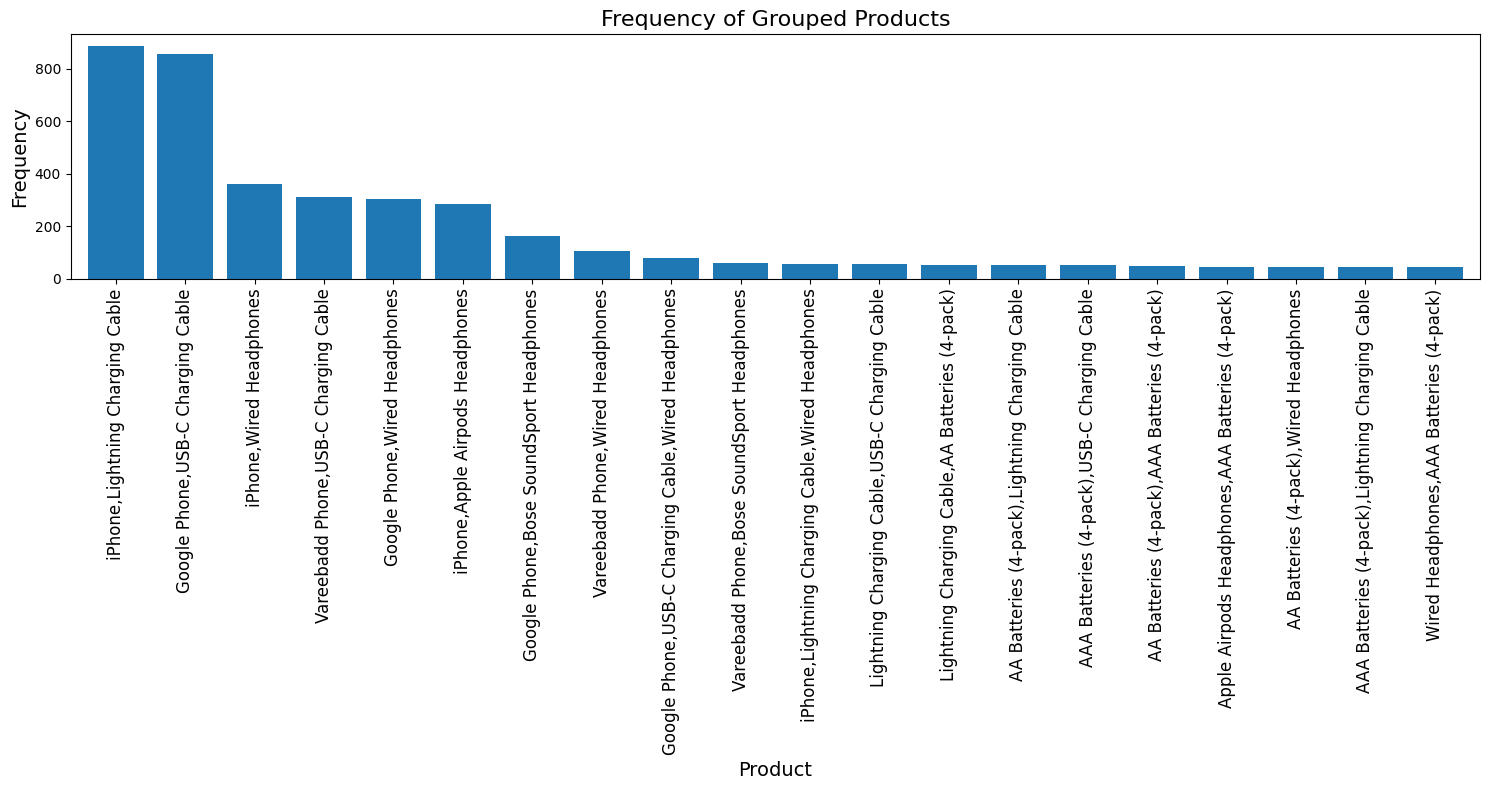

In [214]:
plt.figure(figsize=(15, 8))

df2_group['grouped_product'].value_counts()[0:20].plot.bar(width=0.8)

plt.xlabel("Product", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Frequency of Grouped Products", fontsize=16)
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()